In [1]:
import os 

import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

from Rignak_DeepLearning import deprecation_warnings
deprecation_warnings.filter_warnings()

from keras.models import load_model

import MightyMosaic

Using TensorFlow backend.


In [2]:
face_filename = "3578641 0.png"
full_filename = "2815743_full.jpg"
model_filename = "open_eyes_saliency_256.h5"

In [3]:
model = load_model(model_filename)

D:\Anaconda3\Lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
face_im = np.array(PIL.Image.open(face_filename))/255
full_im = np.array(PIL.Image.open(full_filename))/255

prediction = model.predict(np.expand_dims(face_im, axis=0))[0,:,:,0]

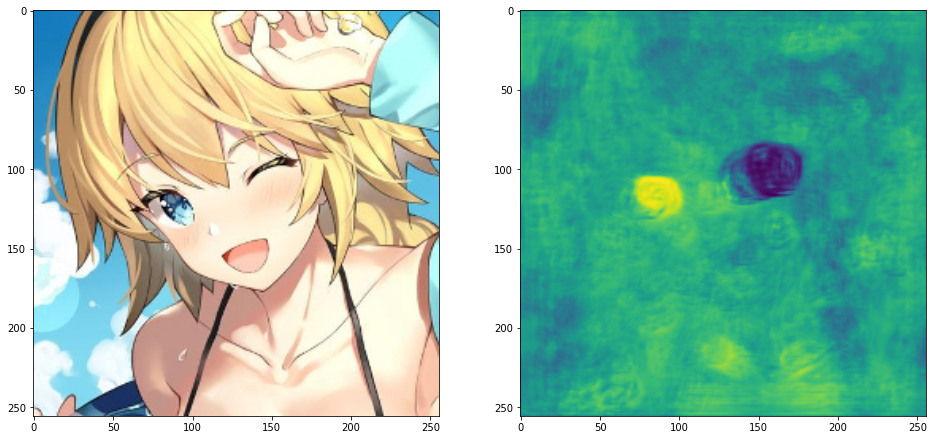

In [5]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(face_im, interpolation='bilinear', vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(prediction, interpolation='bilinear')
plt.show()

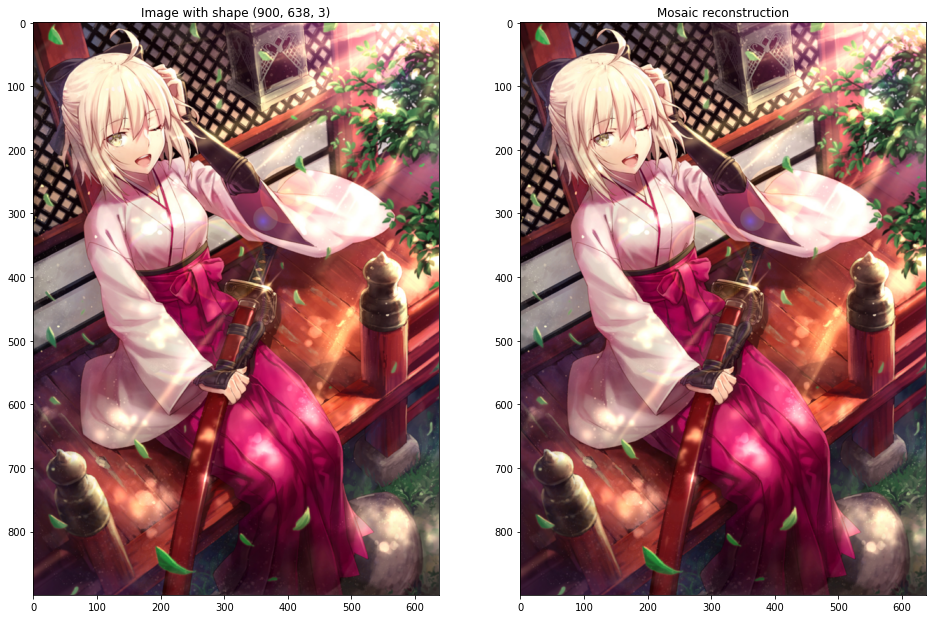

In [6]:

mosaic_without_overlap = MightyMosaic.from_array(full_im, (256,256), overlap_factor=1)

plt.figure(figsize=(16, 16))
plt.subplot(121)
plt.title(f'Image with shape {full_im.shape}')
plt.imshow(full_im, interpolation='bilinear')

plt.subplot(122)
plt.title('Mosaic reconstruction')
plt.imshow(mosaic_without_overlap.get_fusion(), interpolation='bilinear')
plt.show()

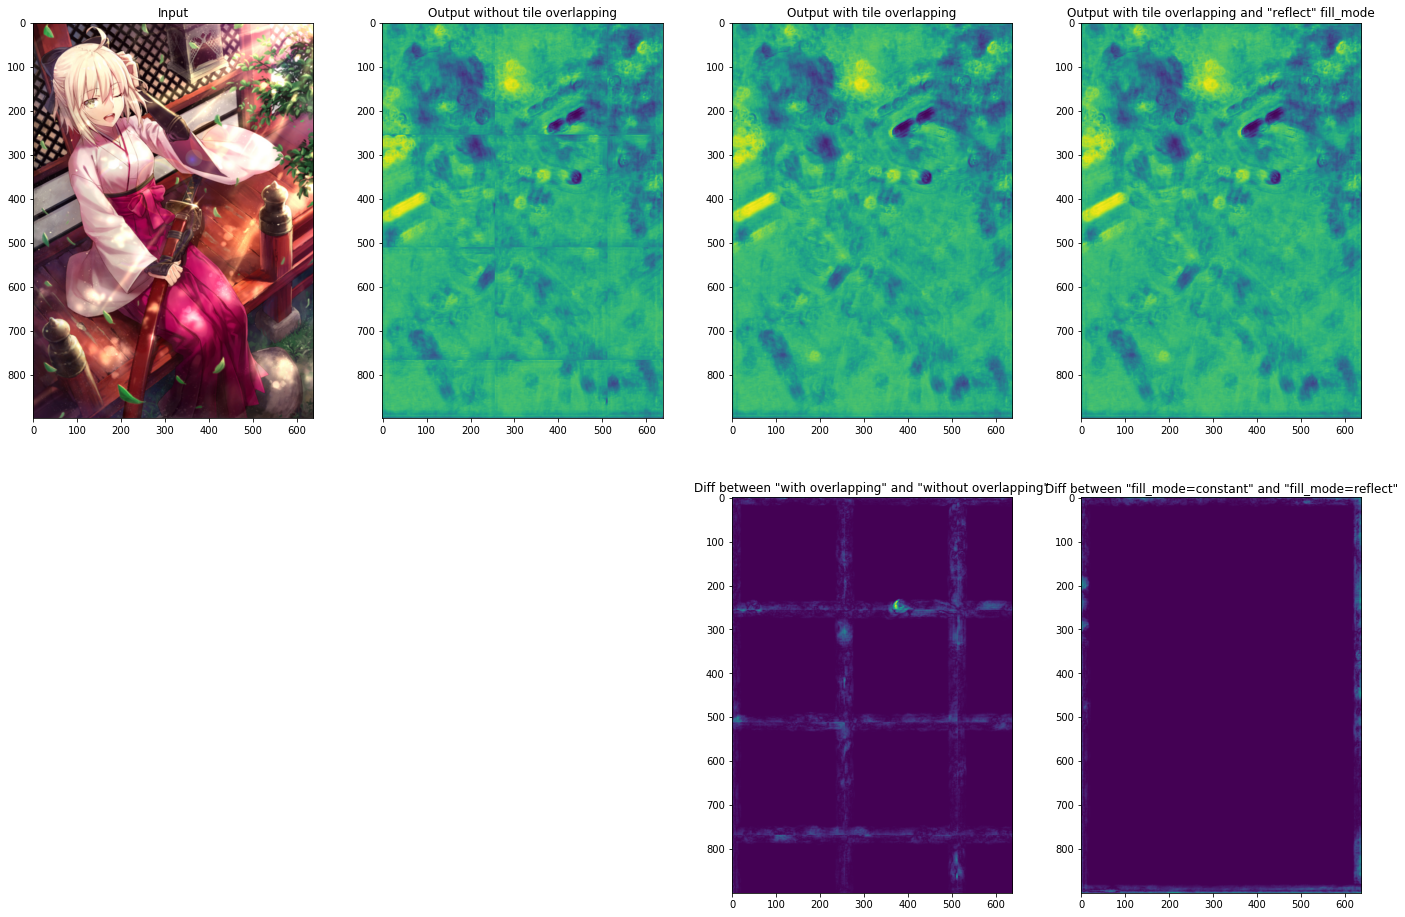

In [7]:
fused_prediction_without_overlap = mosaic_without_overlap.apply(lambda x: model.predict(x)[:,:,:,0], progress_bar=True)
fused_prediction_without_overlap = fused_prediction_without_overlap.get_fusion()

mosaic = MightyMosaic.from_array(full_im, (256,256), overlap_factor=2)
prediction = mosaic.apply(lambda x: model.predict(x)[:,:,:,0], progress_bar=True, batch_size=6)
prediction = prediction.get_fusion()

mosaic_with_reflection = MightyMosaic.from_array(full_im, (256,256), overlap_factor=2, fill_mode='reflect')
prediction_with_reflection = mosaic_with_reflection.apply(lambda x: model.predict(x)[:,:,:,0], 
                                                          progress_bar=True, batch_size=8)
prediction_with_reflection = prediction_with_reflection.get_fusion()

plt.figure(figsize=(24, 16))
plt.subplot(241)
plt.title('Input')
plt.imshow(full_im, interpolation='bilinear')
plt.subplot(242)
plt.title('Output without tile overlapping')
plt.imshow(fused_prediction_without_overlap, interpolation='bilinear')
plt.subplot(243)
plt.title('Output with tile overlapping')
plt.imshow(prediction, interpolation='bilinear')
plt.subplot(244)
plt.title('Output with tile overlapping and "reflect" fill_mode')
plt.imshow(prediction, interpolation='bilinear')
plt.subplot(247)
plt.title('Diff between "with overlapping" and "without overlapping"')
plt.imshow(abs(fused_prediction_without_overlap-prediction), interpolation='bilinear')
plt.subplot(248)
plt.title('Diff between "fill_mode=constant" and "fill_mode=reflect"')
plt.imshow(abs(prediction-prediction_with_reflection), interpolation='bilinear')
plt.show()